In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**To find maximum, minimum, and mean values of temperature, humidity, ph, and rainfall for each crop.**

In [ ]:
crop_statistics = data.groupby('label')[['temperature', 'humidity', 'rainfall']].agg(['min', 'max', 'mean']).reset_index()

# Rename the columns for better readability
crop_statistics.columns = ['Crop',
                           'Min_Temperature', 'Max_Temperature', 'Mean_Temperature',
                           'Min_Humidity', 'Max_Humidity', 'Mean_Humidity',
                           'Min_Rainfall', 'Max_Rainfall', 'Mean_Rainfall']

# Display the calculated statistics
crop_statistics.sort_values(by='Crop', ascending=True)

,Crop,Min_Temperature,Max_Temperature,Mean_Temperature,Min_Humidity,Max_Humidity,Mean_Humidity,Min_Rainfall,Max_Rainfall,Mean_Rainfall
0,apple,21.036527,23.996862,22.630942,90.025751,94.920481,92.333383,100.117344,124.983162,112.654779
1,banana,25.010185,29.908885,27.376798,75.031933,84.978492,80.358123,90.109781,119.847970,104.626980
2,blackgram,25.097374,34.946616,29.973340,60.065349,69.961000,65.118426,60.417903,74.915595,67.884151
3,chickpea,17.024985,20.995022,18.872847,14.258040,19.969789,16.860439,65.113656,94.781896,80.058977
4,coconut,25.008724,29.869083,27.409892,90.017345,99.981876,94.844272,131.090008,225.632366,175.686646
5,coffee,23.059519,27.923744,25.540477,50.045570,69.948073,58.869846,115.156401,199.473564,158.066295
6,cotton,22.000851,25.992374,23.988958,75.005393,84.876690,79.843474,60.653817,99.931008,80.398043
7,grapes,8.825675,41.948657,23.849575,80.016394,83.983517,81.875228,65.010953,74.915062,69.611829
8,jute,23.094338,26.985822,24.958376,70.882596,89.891065,79.639864,150.235524,199.836291,174.792798
9,kidneybeans,15.330426,24.923601,20.115085,18.092240,24.969699,21.605357,60.275525,149.744103,105.919778


Normalising and standardizing dataset.

In [ ]:
average_values = data.groupby("label")[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]].mean().reset_index()
merged_data = pd.merge(data, average_values, on="label", suffixes=("", "_Avg"))
for column in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
  merged_data[column] = merged_data[column + "_Avg"]
  merged_data.drop(column + "_Avg", axis=1, inplace=True)
final_data = merged_data.drop_duplicates(subset="label")

final_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114,rice
100,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988,maize
200,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977,chickpea
300,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778,kidneybeans
400,20.73,67.73,20.29,27.741762,48.061633,5.794175,149.457564,pigeonpeas
500,21.44,48.01,20.23,28.194920,53.160418,6.831174,51.198487,mothbeans
600,20.99,47.28,19.87,28.525775,85.499975,6.723957,48.403601,mungbean
700,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151,blackgram
800,18.77,68.36,19.41,24.509052,64.804785,6.927932,45.680454,lentil
900,18.87,18.75,40.21,21.837842,90.125504,6.429172,107.528442,pomegranate


In [ ]:
data_for_normalization = pd.read_csv("/content/Average_Values_for_All_Crops (1).csv")
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
scaler = MinMaxScaler()
data_normalized = data_for_normalization.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data_for_normalization[numerical_cols])
print("Normalized Data:")
final_data = merged_data.drop_duplicates(subset="label")
data_normalized['Crop_ID'] = range(1, len(final_data) + 1)
data_normalized = data_normalized[['Crop_ID', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
data_normalized

Normalized Data:


,Crop_ID,N,P,K,temperature,humidity,ph,rainfall
0,1,0.020505,1.000000,0.998843,0.253053,0.967802,0.113541,0.415927
1,2,0.822828,0.556302,0.210626,0.572618,0.814242,0.147701,0.377969
2,3,0.214646,0.432736,0.048553,0.747457,0.618820,0.872127,0.204236
3,4,0.215354,0.435455,0.367754,0.000000,0.000000,1.000000,0.261803
4,5,0.032424,0.003229,0.108259,0.574846,1.000000,0.143083,0.713962
5,6,0.832626,0.103595,0.104840,0.448968,0.538694,0.655665,0.630647
6,7,1.000000,0.252316,0.050237,0.344496,0.807642,0.732744,0.263406
7,8,0.044545,0.985638,1.000000,0.335110,0.833696,0.174185,0.212405
8,9,0.602323,0.257585,0.157706,0.409772,0.805031,0.619426,0.709736
9,10,0.020000,0.433331,0.052814,0.083647,0.060845,0.000000,0.384081


Outliers in pH: [8.753795334, 8.718192847000001, 8.490127142, 8.519975748, 8.829273328, 8.621662982, 8.868741443, 8.766128654, 8.736337905, 8.380185271, 8.423873703, 8.719960893, 8.861479668, 3.692863601, 4.371745575, 8.399135957999999, 8.840656256, 9.679240873, 8.985348193, 4.524171562, 9.926212291, 3.71105919, 9.254089438, 3.808429173, 4.52363558, 3.510404312, 3.828031463, 8.869532817, 3.793575185, 4.193189124, 9.392694614, 4.516154055, 8.620107545, 9.45949344, 9.160691747, 9.072011412, 3.504752314, 8.66077954, 3.558822825, 9.416003106, 8.923095695, 8.709291687999999, 4.397698806, 8.532078732999999, 3.5253661, 8.86979671, 9.406887533, 8.35495812, 8.634929739, 9.112771682, 9.93509073, 8.914074888, 8.639586199, 8.621514073, 3.532008668, 4.507523551, 4.525722333]
Outliers in Temperature: [37.46566825, 39.64851881, 12.14190714, 12.7567962, 39.04071989, 39.70772192, 9.467960445, 8.825674745, 11.02105378, 12.087022, 12.80000387, 38.06099482, 39.06555518, 10.89875873, 11.7976469, 11.3630089

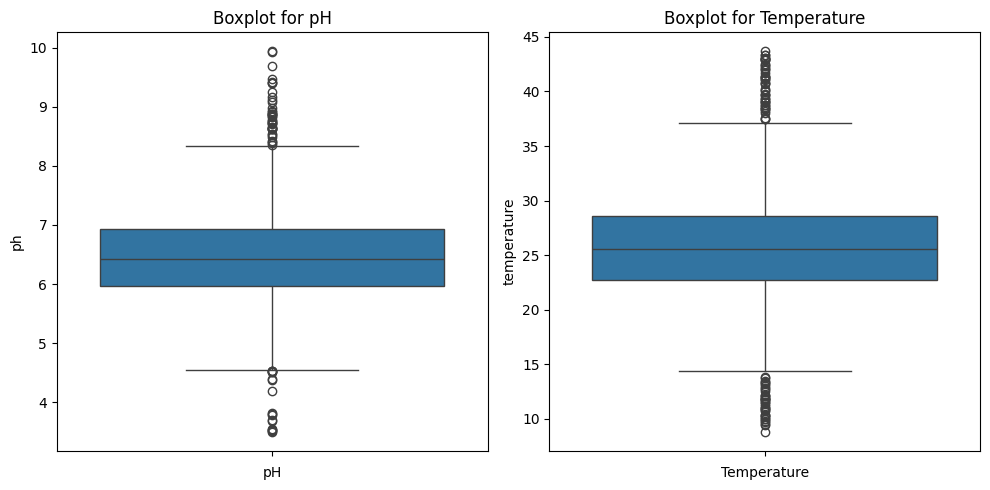

In [ ]:
  # First quartile (25th percentile)
    Q3 = np.percentile(column, 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check for outliers in the 'pH' column
outliers_pH = detect_outliers_iqr(df['ph'])
print("Outliers in pH:", outliers_pH.tolist())

# Check for outliers in the 'Temperature' column
outliers_temp = detect_outliers_iqr(df['temperature'])
print("Outliers in Temperature:", outliers_temp.tolist())

# Visualize with boxplots
plt.figure(figdf = pd.DataFrame(data)
def detect_outliers_iqr(column):
    Q1 = np.percentile(column, 25)size=(10, 5))

# Boxplot for pH
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='ph')
plt.title('Boxplot for pH')
plt.xlabel('pH')

# Boxplot for Temperature
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='temperature')
plt.title('Boxplot for Temperature')
plt.xlabel('Temperature')


plt.tight_layout()
plt.show()

Outliers in Humidity: [15.40589717, 15.65809214, 15.40312102, 15.22538951, 14.69765308, 14.71070537, 14.32313811, 15.11279612, 14.99927489, 14.42457525, 14.25803981, 15.21618225, 14.27327988, 14.92241479, 15.15405941, 15.48083156, 14.70085967, 14.99451145, 14.72115044, 14.44228303, 14.2804191, 14.44008871, 14.76014523, 14.82633099, 14.74071856, 15.57324389, 15.27824066, 14.33847406, 14.77959596, 15.36143547]
Outliers in Rainfall: [226.6555374, 263.9642476, 242.8640342, 262.7173405, 251.0549998, 271.3248604, 241.9741949, 230.4462359, 221.2091958, 264.6148697, 250.0832336, 284.4364567, 231.0863347, 276.65524589999995, 224.55501690000003, 291.2986618000001, 231.3843163, 233.1075816, 224.0581164, 257.0038865, 271.35861370000003, 260.2634026, 240.0810647, 272.2017204, 224.67572310000003, 270.4417274, 233.1321372, 272.29990560000005, 285.2493645, 298.40184710000005, 257.0343554, 248.7183228, 298.5601175, 265.5355937, 233.0453455, 253.7202781, 219.9048349, 227.3637009, 286.5083725, 283.933846

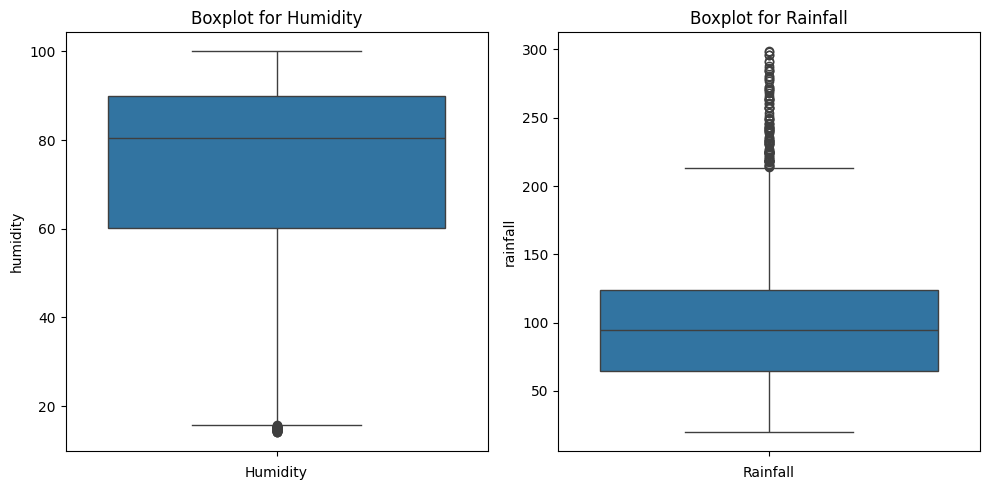

In [ ]:
outliers_humidity = detect_outliers_iqr(df['humidity'])
print("Outliers in Humidity:", outliers_humidity.tolist())

outliers_rainfall = detect_outliers_iqr(df['rainfall'])
print("Outliers in Rainfall:", outliers_rainfall.tolist())

# Visualize with boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='humidity')
plt.title('Boxplot for Humidity')
plt.xlabel('Humidity')


plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='rainfall')
plt.title('Boxplot for Rainfall')
plt.xlabel('Rainfall')


plt.tight_layout()
plt.show()

**Correlation between pH and N for each crop type**

<ipython-input-15-5af349a0ff17>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_data = data.groupby('label').apply(lambda x: x['ph'].corr(x['N'])).reset_index()
<ipython-input-15-5af349a0ff17>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_data, x='Crop', y='Correlation_PH_N', palette='viridis')


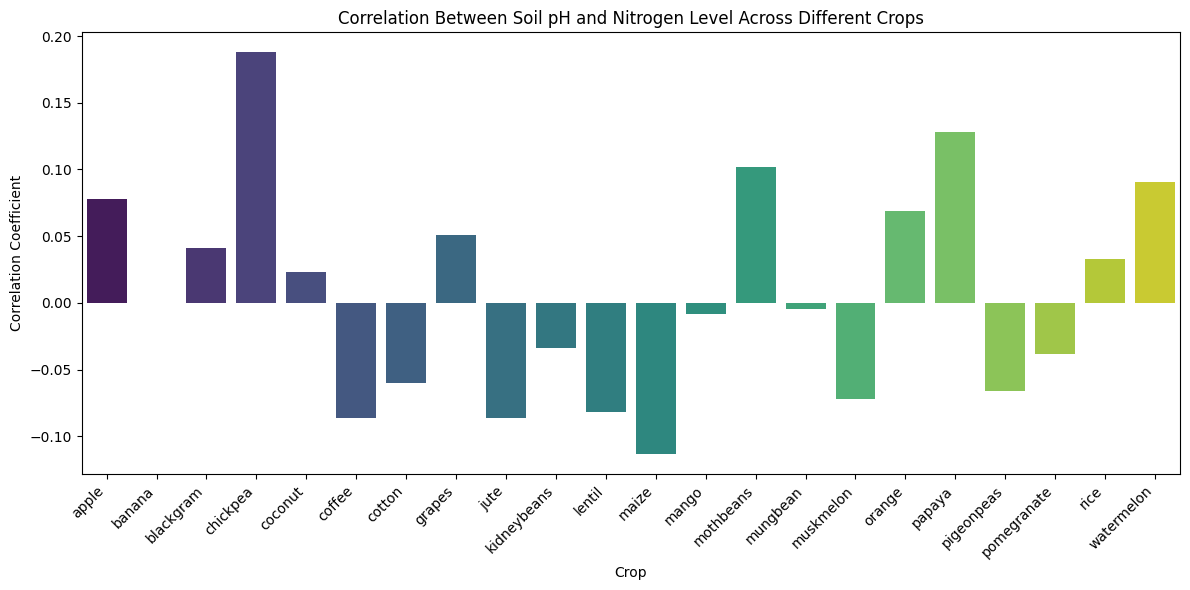

,Crop,Correlation_PH_N
3,chickpea,0.187717
17,papaya,0.128324
13,mothbeans,0.101878
21,watermelon,0.090512
0,apple,0.077911
16,orange,0.068985
7,grapes,0.050602
2,blackgram,0.041058
20,rice,0.033044
4,coconut,0.023419


In [ ]:
# Calculate the correlation between pH and N for each crop type
correlation_data = data.groupby('label').apply(lambda x: x['ph'].corr(x['N'])).reset_index()
correlation_data.columns = ['Crop', 'Correlation_PH_N']

# Visualize the correlation for each crop
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_data, x='Crop', y='Correlation_PH_N', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Between Soil pH and Nitrogen Level Across Different Crops')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Crop')
plt.tight_layout()
plt.show()

# Display the calculated correlations
# Display the calculated correlations, sorted by index in ascending order
correlation_data.sort_index(inplace=True)
correlation_data.sort_values(by='Correlation_PH_N', ascending = False)

Relationship between soil ph and temperature for each crop

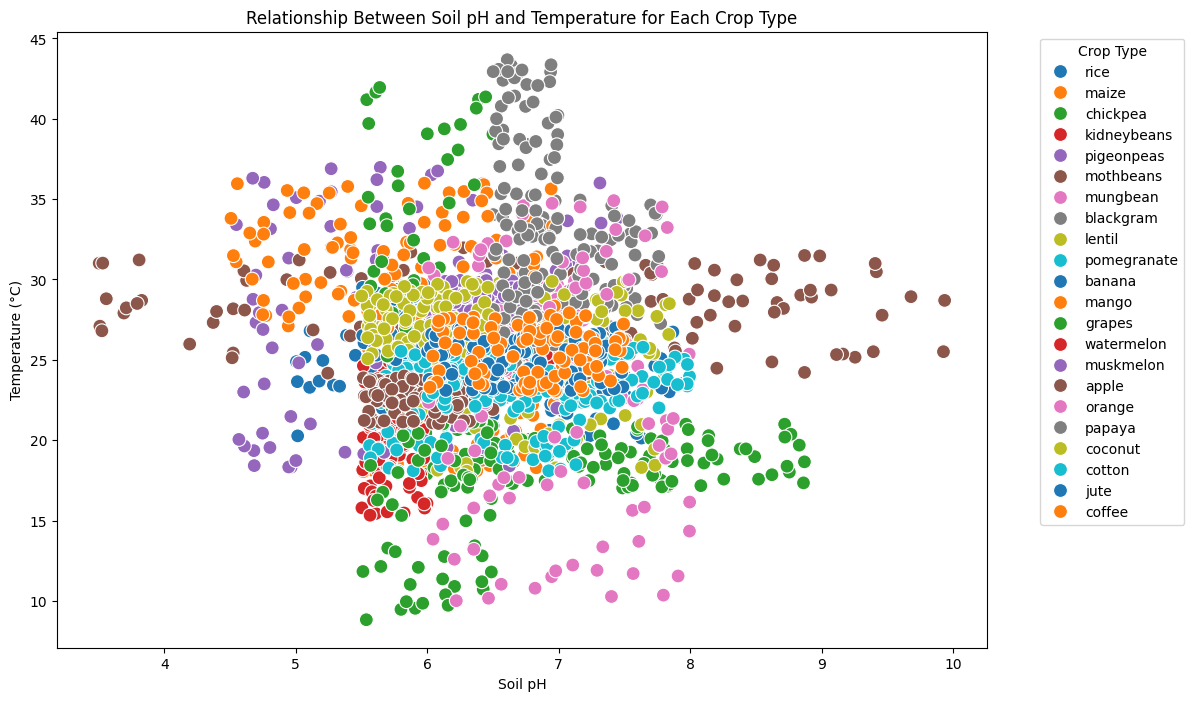

Correlation between pH and Temperature for each crop type:
label          
apple        ph   -0.088977
banana       ph   -0.024960
blackgram    ph    0.081554
chickpea     ph   -0.032874
coconut      ph    0.056366
coffee       ph   -0.027881
cotton       ph   -0.011579
grapes       ph   -0.097304
jute         ph    0.040717
kidneybeans  ph    0.108404
lentil       ph    0.178489
maize        ph    0.093738
mango        ph   -0.036002
mothbeans    ph   -0.015296
mungbean     ph   -0.087111
muskmelon    ph   -0.106167
orange       ph   -0.024056
papaya       ph    0.039672
pigeonpeas   ph    0.160804
pomegranate  ph   -0.009124
rice         ph   -0.060234
watermelon   ph    0.062200
Name: temperature, dtype: float64


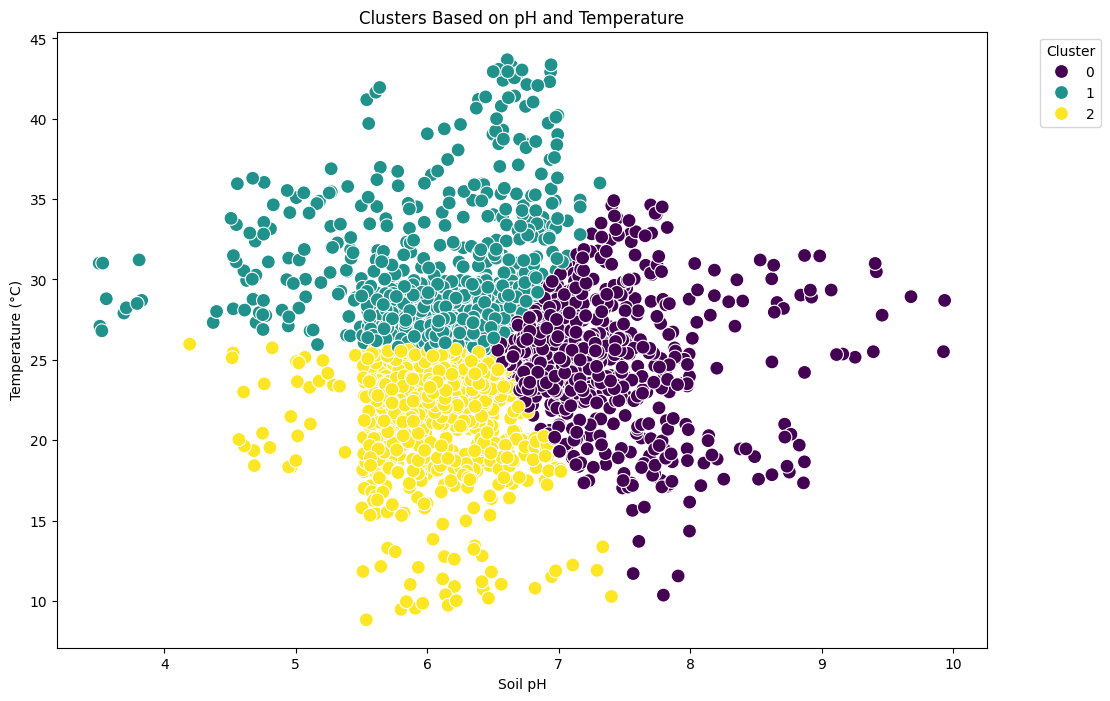

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot of pH vs Temperature for each crop type
sns.scatterplot(data=data, x='ph', y='temperature', hue='label', palette='tab10', s=100)
plt.title("Relationship Between Soil pH and Temperature for Each Crop Type")
plt.xlabel("Soil pH")
plt.ylabel("Temperature (°C)")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 2: Calculate correlation between pH and temperature for each crop type
correlation = data.groupby('label')[['ph', 'temperature']].corr().iloc[0::2, -1]  # Get correlation for each crop type
print("Correlation between pH and Temperature for each crop type:")
print(correlation)

# Step 3: Apply KMeans Clustering to find clusters based on pH and Temperature
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['ph', 'temperature']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot of pH vs Temperature with clusters
sns.scatterplot(data=data, x='ph', y='temperature', hue='Cluster', palette='viridis', s=100, marker='o')
plt.title("Clusters Based on pH and Temperature")
plt.xlabel("Soil pH")
plt.ylabel("Temperature (°C)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Hexbin Plot to visualize density distribution of crops in relation to soil ph and rainfall.

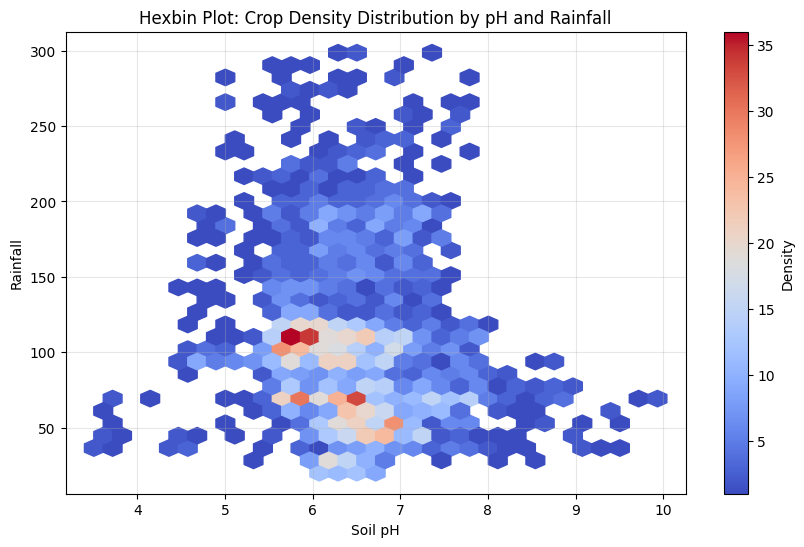

In [ ]:
import matplotlib.pyplot as plt

# Define x and y variables
x = data['ph']       # Soil pH
y = data['rainfall'] # Rainfall

# Create a hexbin plot
plt.figure(figsize=(10, 6))
hexbin = plt.hexbin(x, y, gridsize=30, cmap='coolwarm', mincnt=1)

# Add a colorbar to indicate density
plt.colorbar(hexbin, label='Density')

# Set plot labels and title
plt.xlabel('Soil pH')
plt.ylabel('Rainfall')
plt.title('Hexbin Plot: Crop Density Distribution by pH and Rainfall')
plt.grid(alpha=0.3)
plt.show()


Classification Model to recommend crops based on based on provided parameters

In [ ]:
from sklearn.metrics import r2_score, accuracy_score
# Define features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Assuming 'label' contains crop names

# Normalize the data
scaler = StandardScaler()    #Scale down values to (-3 to +3).
X_scaled = scaler.fit_transform(X)

# Split the data for model training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a k-Nearest Neighbors (k-NN) classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# ... (rest of the code, including the recommend_crop function) ...
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Input data
    input_data = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])

    # Predict the crop
    predicted_crop = knn.predict(input_data)[0]

    # Get average values for the predicted crop
    crop_data = data[data['label'] == predicted_crop]
    avg_values = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].mean()

    # Analyze deviations
    input_values = pd.Series([N, P, K, temperature, humidity, ph, rainfall], index=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    deviations = (input_values - avg_values).abs()
    focus_parameters = deviations[deviations > avg_values * 0.2]  # 20% deviation threshold

    # Display results
    print(f"Recommended Crop: {predicted_crop}")
    print("\nFocus on these parameters (beyond acceptable range):")
    if not focus_parameters.empty:
        print(focus_parameters)
    else:
        print("All parameters are within acceptable range.")

    return predicted_crop, focus_parameters

# Example Usage
N=float(input("Enter the N value: "))
P=float(input("Enter the P value: "))
K=float(input("Enter the K value: "))
temperature=float(input("Enter the temperature: "))
humidity=float(input("Enter the humidity: "))
ph=float(input("Enter the pH: "))
rainfall=float(input("Enter the rainfall: "))
y_pred = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of the model: {accuracy:.2f}")

Enter the N value: 120
Enter the P value: 60
Enter the K value: 40
Enter the temperature: 30
Enter the humidity: 88
Enter the pH: 6.5
Enter the rainfall: 200
Recommended Crop: jute

Focus on these parameters (beyond acceptable range):
N              41.600000
P              13.140000
temperature     5.041624
dtype: float64
Accuracy of the model: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# End of Project

In [ ]:
!zip -r Project.zip